**Цель работы: создание модели Изинга для двумерного случая, проверка на её основе проверка зависимости магнитной
восприимчивости выше температуры Кюри**

**Задачи: создание модели Изинга, исследование зависимости средней энергии от температуры и проверка наличия фазового перехода, подсчёт магнитной восприимчивости при разных температурах и подтверждение закона Кюри.**

In [8]:
import numpy as np
import tqdm

In [21]:
import random
import math
import matplotlib
from matplotlib import pyplot as plt

#энергия одного спина
def energy(i, j, chain, H=0.):
    l = chain.shape[0]

    return -(chain[i-1, j]*chain[i, j] + chain[i, j]*chain[(i+1)%l, j])/2   \
           -(chain[i, j-1]*chain[i, j] + chain[i, j]*chain[i, (j+1)%l])/2   \
           + H*chain[i][j]/2
          

#разница между пробной энергией и текущей
def try_energy(i, j, chain, H):
    return -4*energy(i, j, chain, H)


def make_chain(N): # returns matrix NxN
    A = []
    for i in range(N):
        A.append([-1 if random.randint(0, 1) else 1 for _ in range(N)])
    return np.array(A)

def calc_tot_en(chain, h):
    l = chain.shape[0]
    tot_en = 0.0
    for i in range(l):
        for j in range(l):
            tot_en = tot_en + energy(i, j, chain, H)
    return tot_en

def average_E (chain, T, H, Niter=100, randomm=True):
    tot_en = calc_tot_en(chain, H)
    avg_en = 0.0
    N = chain.shape[0]
    if randomm:
        for i in range(Niter):
            try_id = random.randint(0, N-1)
            try_jd = random.randint(0, N-1)
            delta_E = try_energy(try_id, try_jd, chain, H)
            #print (delta_E)
            if delta_E < 0:
                tot_en += delta_E
                chain[try_id, try_jd] = -chain[try_id, try_jd]
            else:
                if random.uniform(0,1) < math.exp(-(delta_E)/T):
                    tot_en += delta_E
                    chain[try_id, try_jd] = -chain[try_id, try_jd]
            avg_en += tot_en/Niter
    else:
        for i in range(N):
            for j in range(N):
                delta_E = try_energy(i, j, chain)
                #print (delta_E)
                if delta_E < 0:
                    tot_en += delta_E
                    chain[i, j] = -chain[i, j]
                else:
                    if random.uniform(0,1) < math.exp(-(delta_E)/T):
                        tot_en += delta_E
                        chain[i, j] = -chain[i, j]
                avg_en += tot_en/Niter
    return avg_en


def metropolis(chain, T, H=0., etol=0.0001, steps_per_cycle=100, random=True):
    avg_en = 0.0
    avg_en_prev = -100*etol
    Ncycles = 0
    energies = []
    steps = 0
    while math.fabs(avg_en-avg_en_prev) > etol:
        #print (avg_en_prev, avg_en)
        avg_en_prev = avg_en
        steps += steps_per_cycle
        avg_en = average_E(chain, T, H, steps_per_cycle, random)
        energies.append(avg_en)
        avg_en = (avg_en_prev*Ncycles+avg_en)/(Ncycles+1)
        Ncycles += 1
    return energies



# task 1

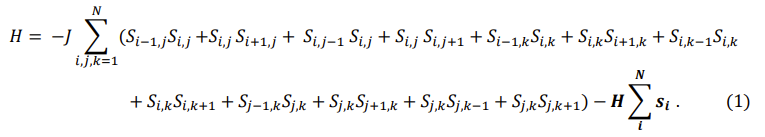

In [ ]:
T = 3

chain = make_chain(10)
energies = metropolis(chain, T, etol = 1e-6)

disp = 0
average = sum(energies)/len(energies)
for i in range(len(energies)):
    disp += (energies[i] - average)**2
disp = math.sqrt(disp)/math.fabs(average)

print (sum(energies)/len(energies))

# theory = -1000 * math.tanh(1/T)
# print (theory)

print(disp)

-195.09921221586004
-321.51273753163434
6.154746559549035


In [ ]:
T = 3

chain = make_chain(10)
energies = metropolis(chain, T, 1e-6, 100, False)

disp = 0
average = sum(energies)/len(energies)
for i in range(len(energies)):
    disp += (energies[i] - average)**2
disp = math.sqrt(disp)/math.fabs(average)

print (sum(energies)/len(energies))


print(disp)

-194.71893682588575
3.331806399162701


Незначительно результат изменится

# Task 2

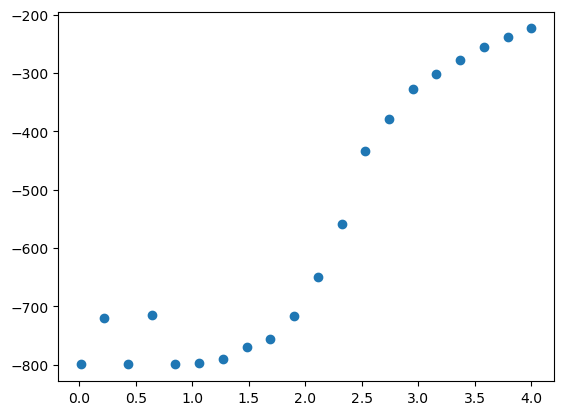

In [13]:
T = np.linspace(0.01, 4, 20)
avg_energies = []

for t in T:
    chain = make_chain(20)
    energies = metropolis(chain, t, etol=1e-6)
    average = sum(energies)/len(energies)
    avg_energies.append(average)

plt.scatter(T, avg_energies)


Если уменьшить в try energy c -8 до -4, то получится такая картина

Фазовый переход примерно на 2.5, тк меняется знак второй производной функции энергии

# Task 3

In [41]:
T_ph = np.linspace(1.5, 3.0, 15)
avg_energies_phase_shift = []

for t in T_ph:
    chain = make_chain(20)
    energies = metropolis(chain, t, etol=1e-6)
    average = sum(energies)/len(energies)
    avg_energies_phase_shift.append(average)

(-800.0, -200.0)

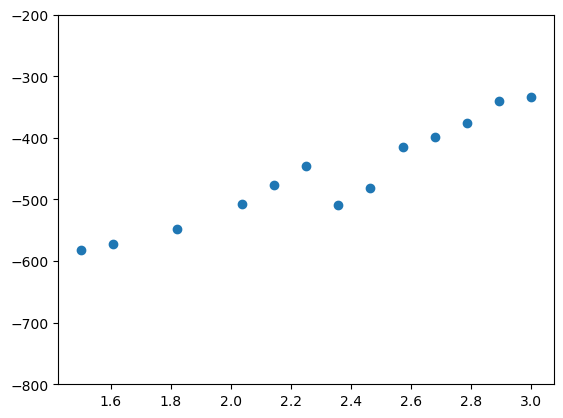

In [46]:
plt.scatter(T_ph,avg_energies_phase_shift)
plt.ylim(-800,-200)

Есть небольшой скачок, как раз примерно на 2.3

**Task 4**

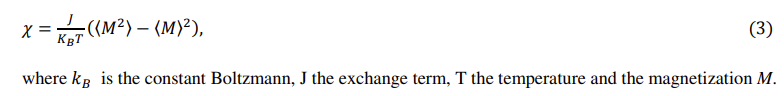

In [22]:
T = 3
H = 1.

chain = make_chain(20)
energies = metropolis(chain, T, H, etol = 1e-6)

disp = 0
average = sum(energies)/len(energies)
for i in range(len(energies)):
    disp += (energies[i] - average)**2
disp = math.sqrt(disp)/math.fabs(average)

print (sum(energies)/len(energies))

# theory = -1000 * math.tanh(1/T)
# print (theory)

print(disp)

-824.0675397358423
5.240715231138422


In [34]:
def metrololis(chain, T, H, etol=0.0001, steps_per_cycle=100):
    avg_en = 0.0
    avg_en_prev = -100*etol
    Ncycles = 0
    energies = []
    steps = 0
    SS = []
    while math.fabs(avg_en-avg_en_prev) > etol:
        #print (avg_en_prev, avg_en)
        avg_en_prev = avg_en
        steps += steps_per_cycle
        avg_en = average_E(chain, T, H, steps_per_cycle)
        energies.append(avg_en)
        avg_en = (avg_en_prev*Ncycles+avg_en)/(Ncycles+1)
        Ncycles += 1
        
        # ну среднюю поляризованность считаем
        S = np.sum(np.sum(chain, axis=0)) / chain.shape[0]**2
        SS.append(S)
    
    return SS


In [37]:
T1 = np.linspace(0.1, 30, 20)
H = 1.

Xi = []

for t in T1:
    chain = make_chain(20)
    S = np.array(metrololis(chain, t, H,  etol = 1e-6))
    a = np.mean(S**2)
    b = np.mean(S)**2
    Xi.append(((a - b) / t / 1.38/10**23)**(-1))

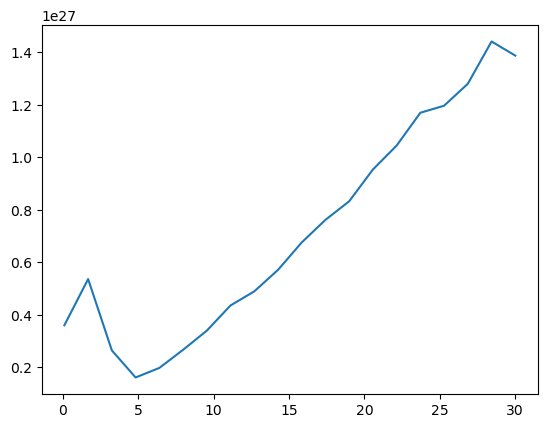

In [38]:
plt.plot(T1, Xi)

наблюдается выполнение закона Кюри, в левой части графика, как и в прошлых пунктах, происходит что-то непонятное.

**Вывод: мы обобщили на двумерный случай модель Изинга, выяснили, что результаты при случайном и при последовательном перебирании спинов отличаются немного, рассчитали энергии при разных температурах и выявили фазовый переход по смене знака второй производной. Произвели рассчет намагниченности и магнитной восприимчивости, подтвердили закон Кюри**